### 1. Problema
**1.1. - Descrição do problema de negócio**: atualmente, as empresas lidam com o problema de turnover - alta rotatividade de funcionários dentro de um determinado setor. Através da análise de dados relacionada ao empregado, é possível prever se este vai sair ou continuar trabalhando na empresa?

**1.2. - Dataset utilizado**: employee-attrition-data  
Link: https://www.kaggle.com/HRAnalyticRepository/employee-attrition-data/downloads/employee-attrition-data.zip/2

**1.3. - Informações sobre os atributos**:

| Nome do Atributo no Dataset  | Descrição do atributo |
| ------------- | ------------- |
| EmployeeID | Identificador do funcionário |
| recorddate_key | Data da gravação do registro |
| birthdate_key | Data do aniversário |
| orighiredate_key | Data do início do contrato |
| terminationdate_key | Data do fim do contrato |
| age | Idade |
| length_of_service | Tempo de serviço (ano) |
| city_name | Cidade |
| department_name | Nome do departamento |
| job_title | profissão |
| store_name | Identificador da profissão |
| gender_short | Gênero (M/F) |
| gender_full | Gênero (Masculino/Feminino) |
| termreason_desc | Descrição da razão para o fim do contrato |
| termtype_desc | Descrição do tipo para o fim do contrato |
| STATUS_YEAR | Ano da situação |
| STATUS | Descrição da Situação |
| BUSINESS_UNIT | Unidade de negócio |

**Variável preditora**: STATUS

### 2. Importando Módulos

In [3]:
# biblioteca para manipulação de datas e tempo
import time as time
from datetime import timedelta

# biblioteca de MANIPULAÇÃO DE DATAFRAMES
import pandas as pd

# biblioteca de MANIPULAÇÃO DE ARRAYS E MATRIZES (N-DIMENSIONAIS)
import numpy as np

# biblioteca de VISUALIZAÇÃO DE DADOS
import matplotlib.pyplot as plt
%matplotlib inline

# biblioteca de ESTATÍSTICA gráfica usada para explorar os dados
import seaborn as sns

# biblioteca para DIVISÃO DOS DADOS, AVALIAÇÃO DA PERFORMANCE, TUNNING DE PARÂMETROS
from sklearn import model_selection

# bibliotecas de PRÉ-PROCESSAMENTO
from sklearn.preprocessing import MinMaxScaler # normaliza a escala dos dados das variáveis preditoras
from sklearn.preprocessing import StandardScaler # normaliza a distribuição dos dados gerando uma dist. Gaussiana (normal)
from sklearn.preprocessing import Normalizer # padroniza os dados em escala 1

# biblioteca que habilita montar uma série de etapas. Exemplo: normalização de dados + geração do modelo preditivo
from sklearn.pipeline import Pipeline

# bibliotecas de MACHINE LEARNING
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# bibliotecas para AVALIAÇÃO DA QUALIDADE DAS PREVISÕES
#from sklearn.metrics import classification_report
#from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# desabilitando mensagens de warnings
from sklearn.exceptions import DataConversionWarning
import warnings

def disable_DataConversionWarning():
    warnings.filterwarnings(action='ignore', category=DataConversionWarning)

def disable_FutureWarning():
    warnings.filterwarnings(action='ignore', category=FutureWarning)

def enable_All_Warning():
    warnings.simplefilter('always')

### 3. Importando Dataset

In [134]:
file = "C:\\temp\\employee-attrition-data.csv"

data = pd.read_csv(filepath_or_buffer=file, header=0, sep=',')
print("Primeiras 5 linhas do dataset...")
data.head(5)

Primeiras 5 linhas do dataset...


,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


### 4. Análise Exploratória

In [135]:
print('Qtd. observações (linhas):', data.shape[0])
print('Qtd. variáveis (colunas):', data.shape[1])
data.shape

Qtd. observações (linhas): 49653
Qtd. variáveis (colunas): 18


(49653, 18)

In [136]:
print("Tipagem das colunas do dataset:")
data.dtypes

Tipagem das colunas do dataset:


EmployeeID              int64
recorddate_key         object
birthdate_key          object
orighiredate_key       object
terminationdate_key    object
age                     int64
length_of_service       int64
city_name              object
department_name        object
job_title              object
store_name              int64
gender_short           object
gender_full            object
termreason_desc        object
termtype_desc          object
STATUS_YEAR             int64
STATUS                 object
BUSINESS_UNIT          object
dtype: object

In [137]:
print("Estatística descritiva das variáveis numéricas:")
data.describe()

Estatística descritiva das variáveis numéricas:


,EmployeeID,age,length_of_service,store_name,STATUS_YEAR
count,49653.000000,49653.000000,49653.000000,49653.000000,49653.000000
mean,4859.495740,42.077035,10.434596,27.297605,2010.612612
std,1826.571142,12.427257,6.325286,13.514134,2.845577
min,1318.000000,19.000000,0.000000,1.000000,2006.000000
25%,3360.000000,31.000000,5.000000,16.000000,2008.000000
50%,5031.000000,42.000000,10.000000,28.000000,2011.000000
75%,6335.000000,53.000000,15.000000,42.000000,2013.000000
max,8336.000000,65.000000,26.000000,46.000000,2015.000000


In [138]:
print("Possibilidade de valores para CLASSE (STATUS):", data["STATUS"].unique())

Possibilidade de valores para CLASSE (STATUS): ['ACTIVE' 'TERMINATED']


##### Adicionando a variável "gender_short" para formato numérico, com base nas possibilidades de valores da mesma.

In [6]:
data['gender_short_Numerica'] = np.where(data['gender_short']=='M', 1, 0)

##### Adicionando CLASSE numérica no DATASET, com base nas possibilidades de valores da mesma.

In [7]:
data['ClasseNumerica'] = np.where(data['STATUS']=='ACTIVE', 1, 0)
data.tail(5)

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT,gender_short_Numerica,ClasseNumerica
49648,8258,12/1/2015 0:00,5/28/1994,8/19/2013,12/30/2015,21,2,Valemount,Dairy,Dairy Person,34,M,Male,Layoff,Involuntary,2015,TERMINATED,STORES,1,0
49649,8264,8/1/2013 0:00,6/13/1994,8/27/2013,8/30/2013,19,0,Vancouver,Customer Service,Cashier,44,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES,0,0
49650,8279,12/1/2015 0:00,7/18/1994,9/15/2013,12/30/2015,21,2,White Rock,Customer Service,Cashier,39,F,Female,Layoff,Involuntary,2015,TERMINATED,STORES,0,0
49651,8296,12/1/2013 0:00,9/2/1994,10/9/2013,12/31/2013,19,0,Kelowna,Customer Service,Cashier,16,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES,0,0
49652,8321,12/1/2014 0:00,11/28/1994,11/24/2013,12/30/2014,20,1,Grand Forks,Customer Service,Cashier,13,F,Female,Layoff,Involuntary,2014,TERMINATED,STORES,0,0


##### Verificando a distribuição da CLASSE...

In [140]:
print('-> Distribuição das Classes:', '\n')

QtdObservacoes = data.shape[0]
QtdValClasse = data['STATUS'].unique().size
count = 0

print('Quantidade de observações:', QtdObservacoes)

while count < QtdValClasse:
    print(data['STATUS'].unique()[count], ':', (data.groupby('STATUS').size())[count], '(', (((data.groupby('STATUS').size())[count]/ (QtdObservacoes)) * 100), '% )')
    count = count + 1

-> Distribuição das Classes: 

Quantidade de observações: 49653
ACTIVE : 48168 ( 97.00924415443176 % )
TERMINATED : 1485 ( 2.990755845568244 % )


##### Visualizando a distribuiçao dos dados...

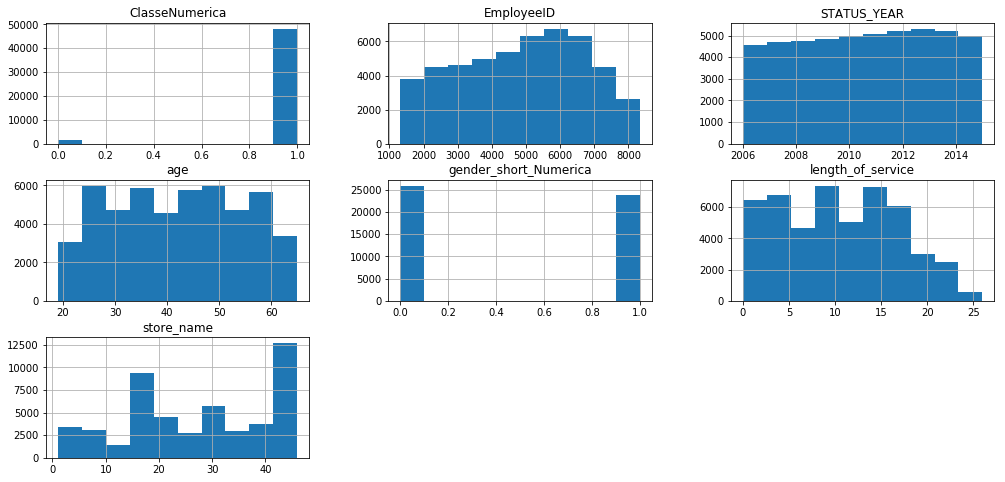

In [74]:
data.hist(sharex=False, sharey=False, figsize=(17,8), grid=True)
plt.show()

##### Visualizando a correlação entre as variáveis...

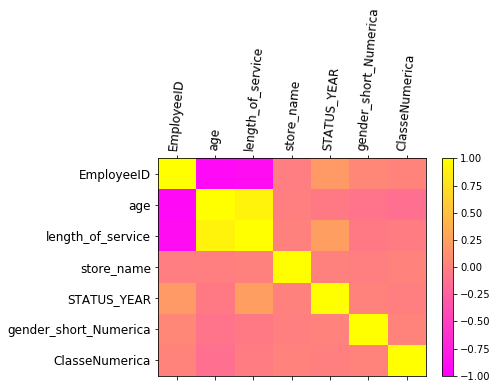

In [75]:
#variável values_corr aramzena a matriz de correlação tabular
ColunaNumericas = (data._get_numeric_data()).columns.tolist() #coloca as colunas numéricas em uma lista
QtdTotalElementos = len(ColunaNumericas)

values_corr = data.corr() #coloca a matrix de correlação tabular em um objeto "values_corr"

fig = plt.figure() #montando o gráfico
ax = fig.add_subplot(1,1,1) #divisão da figura: qtd. linhas, qtd. colunas, posição
correlation_matrix = ax.matshow(values_corr
                                ,vmin = -1
                                ,vmax = 1
                                ,interpolation = 'none'
                                ,cmap = 'spring' #'hot_r', 'pink_r', 'spring', 'spring_r'
                                ,aspect='auto'
                                #,alpha = 0.75
                                ,origin = 'upper'
                               ) #matshow -> plota um array ou matriz como uma imagem

fig.colorbar(correlation_matrix) #barra de cores que indica a "temperatura"

ticks = np.arange(0, QtdTotalElementos, 1) #range da escala de valores. Sabendo que os valores de Corr ficam entre -1 e 1.
ax.set_xticks(ticks)
ax.set_yticks(ticks)

ax.set_xticklabels(labels=ColunaNumericas, rotation=85, fontsize=12)
ax.set_yticklabels(labels=ColunaNumericas, fontsize=12)
plt.show()

##### Visualizando a relação das principais variáveis com a classe...

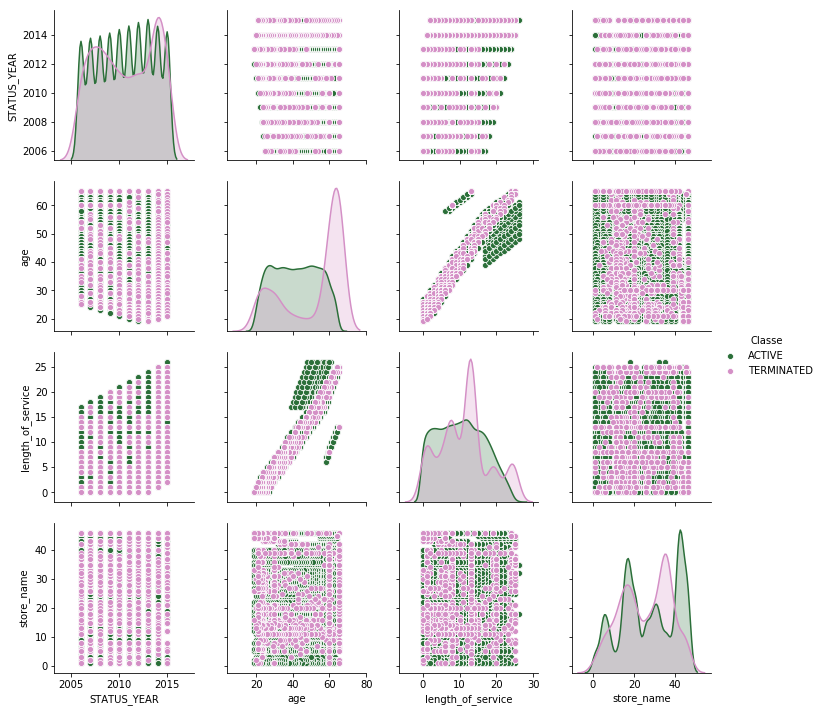

In [76]:
ColunaNumericas = ['STATUS_YEAR', 'age', 'length_of_service', 'store_name']
dataframe = data[ColunaNumericas]

dataframe = dataframe.assign(Classe=data['STATUS']) #assign=add nova coluna com dados em um dataframe jé existente

sns.pairplot(data=dataframe, hue="Classe", kind='scatter', palette="cubehelix") # 'cubehelix', Set2', 'Paired'

### 5. Preparação dos Dados
##### Separando variáveis INDEPENDENTES (preditoras) de DEPENDENTES (previsoras)

In [114]:
ColunaNumericas = (data._get_numeric_data()).columns.tolist() #coloca as colunas numéricas em uma lista
QtColunasNumericas = len(ColunaNumericas)-1 #contando a quantidade de colunas (-1 pois o índice começa em ZERO)

# Criando datasets para variáveis preditoras e previsoras (técnica de SLICE)
preditoras = (data[ColunaNumericas]).values[:,0:QtColunasNumericas] # index QtColunasNumericas é excludente no slice!
alvo = (data[ColunaNumericas]).values[:,QtColunasNumericas] # QtColunasNumericas = index da última coluna = CLASSE

print('Tipo do objeto "preditoras" (variáveis preditoras):', type(preditoras))
print('Tipo do objeto "alvo" (variável previsão):', type(alvo))
print('Dimensão do objeto "preditoras" (variáveis preditoras):', preditoras.shape)
print('Dimensão do objeto "alvo" (variável previsão):', alvo.shape)

Tipo do objeto "preditoras" (variáveis preditoras): <class 'numpy.ndarray'>
Tipo do objeto "alvo" (variável previsão): <class 'numpy.ndarray'>
Dimensão do objeto "preditoras" (variáveis preditoras): (49653, 6)
Dimensão do objeto "alvo" (variável previsão): (49653,)
[[1318   52   17   35 2006    1]
 [1318   53   18   35 2007    1]
 [1318   54   19   35 2008    1]
 ...
 [8279   21    2   39 2015    0]
 [8296   19    0   16 2013    0]
 [8321   20    1   13 2014    0]]


##### Divisão dos dados em TREINO e TESTE

In [9]:
#Definição do tamanho das amostras
test_size = 0.20 # % destinado para TESTE

#Garante que os resultados podem ser reproduzidos
#Isso é importante para comparar a acurácia com outros algoritmos de Machine Learning.
seed = 7 #"semente" = if int, is the seed used by the random number generator.

# Conjuntos de dados de treino e de teste
preditoras_treino, preditoras_teste, alvo_treino, alvo_teste = model_selection.train_test_split(
                                                                     preditoras
                                                                    ,alvo
                                                                    ,test_size = test_size
                                                                    ,random_state = seed #semente
                                                                    )

### 6. Avaliação do(s) Algoritmo(s)
Através do PIPELINE, faz todas as oprações abaixo em sequência:
- Divisão dos dados em TREINO e TESTE através de KFOLD's
- Faz a validação cruzada dos algoritmos de classificação envolvidos no processo
- Exibe a acurácia dos modelos

---> AVALIAÇÃO DESCRITIVA DA ACURÁCIA <---
-------------------------------------------------------------------- 

MODELO: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)      

MÉDIA: 97.09%
DESVIO PADRÃO: 0.39%
Tempo de execução: 0:00:03 (HH:MM:SS)
-------------------------------------------------------------------- 

MODELO: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')      

MÉDIA: 96.96%
DESVIO PADRÃO: 0.43%
Tempo de execução: 0:00:01 (HH:MM:SS)
-------------------------------------------------------------------- 

MODELO: DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
 

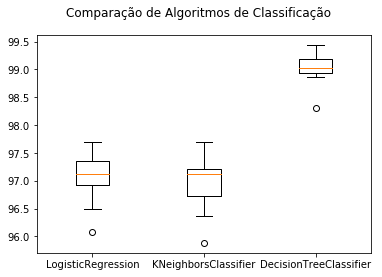

In [13]:
# chamando a função para desabilitar warning de conversão de valores
disable_DataConversionWarning()
disable_FutureWarning()

# Criando modelo de Machine Leanring a partir de cada algoritmo
# Utilizando como métrica a ACURÁCIA. Quanto > o valor, melhor.
modelos = []
modelos.append(('LogisticRegression', LogisticRegression()))
#modelos.append(('LinearDiscriminantAnalysis', LinearDiscriminantAnalysis()))
modelos.append(('KNeighborsClassifier', KNeighborsClassifier()))
modelos.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
#modelos.append(('GaussianNB', GaussianNB()))
#modelos.append(('SVC', SVC()))
resultados = []
nomes = []

modelos_nome = [] #irá armazenar o NOME do modelo preditivo usado
mensagens = [] #irá armazenar mensagens
tempo = []

#Definição do tamanho das amostras que irão ser usadas nas predições
n_folds = 15 #qtd dobras de cada instância (amostragem) de dados
#n_instances = len(preditoras_treino) #quantidade de instâncias que irão ser usadas nas predições
seed = 7 #"semente" = if int, is the seed used by the random number generator.

for nome, modelo in modelos:
    # Seta a data de início do processamento
    start_time = time.time()

    # Técnica de amostras de dados - separando os dados em K_FOLDS (dobras)
    k_folds = model_selection.KFold(n_splits = n_folds, random_state = seed)

    #Criação do modelo
    result_saida = model_selection.cross_val_score(modelo #estimator -> o algoritmo de ML utilizado para TREINO e TESTE
                                                    ,preditoras_treino # x = variável com os valores preditores
                                                    ,alvo_treino # y = variável alvo se o modelo for de APRENDIZADO SUPERVISIONADO. No caso, regressão atende esse requisito.
                                                    ,cv = k_folds # represente ESTRATÉGIA da divisão da validação cruzada.
                                                    #,n_jobs = -1 #qtd processadores atuando na atividade. -1 -> TODOS.
                                                    ,scoring = 'accuracy'
                                                    #,verbose = 5 # modo verbosa loga as informaçõs do processamento
                                                    )

    #Colocando o NOME do modelo medido em uma lista.
    modelos_nome.append(nome)
    #Colocando o resultado da acurácia do modelo em uma lista. Scoring selecionado: "accuracy".
    resultados.append(result_saida * 100)
    #Saída para mensagem final
    mensagens.append('MODELO: %s      \n\nMÉDIA: %.2f%%\nDESVIO PADRÃO: %.2f%%' % (modelo, (result_saida.mean()*100), (result_saida.std()*100)))

    # Seta o tempo despendido (em segundos) pelo processamento
    tempo.append(time.time() - start_time)

#Forma descritiva
qtd_mensagens = len(mensagens)
iterador = 0

print('---> AVALIAÇÃO DESCRITIVA DA ACURÁCIA <---')
while qtd_mensagens > iterador:
    print('--------------------------------------------------------------------', '\n')
    print(mensagens[iterador])
    print('Tempo de execução: %s (HH:MM:SS)' % timedelta(seconds=round(tempo[iterador])))
    iterador = iterador + 1
print('--------------------------------------------------------------------')

#Gerando gráfico para comparativo da acurácia dos modelos
fig = plt.figure()
fig.suptitle('Comparação de Algoritmos de Classificação')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(modelos_nome)
plt.show()

# função para RE-HABILITAR TODAS as mensagens de WARNING
enable_All_Warning()

### 7. Criação do modelo preditivo
##### Considerando os algoritmos envolvidos no processo, o que teve melhor acurácia foi o DecisionTreeClassifier.

In [128]:
# Chamando a função para desabilitar warning de conversão de valores
disable_DataConversionWarning()
disable_FutureWarning()

###########################################################################################

# Criando o pipeline
pipeline = []
#pipeline.append(('Standardize', StandardScaler()))
#pipeline.append(('ScaleFit', MinMaxScaler()))
#pipeline.append(('Normalizer', Normalizer()))
#pipeline.append(('Binarizer', Binarizer()))
pipeline.append(('DecisionTreeClassifier', DecisionTreeClassifier()))

# Gerando o pipeline de execuções
pipeline = Pipeline(steps=pipeline)

# Criando o modelo
model = pipeline.fit(preditoras_treino, alvo_treino)

# Aplicando o modelo aos dados de teste
previsoes = model.predict(preditoras_teste)

# Imprimindo o resultado
print('-> Acurácia do Modelo:', str(round((accuracy_score(alvo_teste, previsoes)*100),2)) + '%')
print('\n-> Matriz de Confusão:\n', confusion_matrix(alvo_teste, previsoes), '\n')
print('-> Relatório Final:\n\n', classification_report(alvo_teste, previsoes))

###########################################################################################
# função para RE-HABILITAR TODAS as mensagens de WARNING
enable_All_Warning()

-> Acurácia do Modelo: 99.09%

-> Matriz de Confusão:
 [[ 271   57]
 [  33 9570]] 

-> Relatório Final:

               precision    recall  f1-score   support

           0       0.89      0.83      0.86       328
           1       0.99      1.00      1.00      9603

   micro avg       0.99      0.99      0.99      9931
   macro avg       0.94      0.91      0.93      9931
weighted avg       0.99      0.99      0.99      9931



### 8. Testando o Modelo Final com Dados Externos

In [131]:
# Local onde ficará alocado o arquivo de INPUT
file = 'C:\\temp\\file_to_prediction-employee-attrition-data.csv'
df = pd.read_csv(filepath_or_buffer=file, header=0, sep=',')
print('---> Dados para AVALIAÇÃO do modelo preditivo (FORMATO = DataFrame):\n')

# Adicionando a variável "gender_short" para formato numérico, com base nas possibilidades de valores da mesma.
df['gender_short_Numerica'] = np.where(df['gender_short']=='M', 1, 0)

# Adicionando CLASSE numérica no DATASET, com base nas possibilidades de valores da mesma.
df['ClasseNumerica'] = np.where(df['CORRECT_STATUS']=='ACTIVE', 1, 0)
df.tail(5)

df

---> Dados para AVALIAÇÃO do modelo preditivo (FORMATO = DataFrame):



,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,CORRECT_STATUS,BUSINESS_UNIT,gender_short_Numerica,ClasseNumerica
0,8322,12/1/2014 0:00,11/28/1994,11/24/2013,12/30/2014,20,1,Grand Forks,Customer Service,Cashier,13,F,Female,Layoff,Involuntary,2014,ACTIVE,STORES,0,1
1,8323,12/31/2012 0:00,1/3/1994,8/28/2005,1/1/2006,24,17,Vancouver,Executive,CEO,3,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE,1,1
2,8324,12/05/2015 0:00,1/3/1965,8/28/2005,1/1/2015,53,19,Vancouver,Executive,CEO,18,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE,1,1
3,8325,12/09/2016 0:00,1/3/1992,8/28/2005,1/1/2016,26,20,Vancouver,Executive,CEO,3,F,Female,Not Applicable,Not Applicable,2009,TERMINATED,HEADOFFICE,0,0
4,8326,12/17/2016 0:00,1/3/1995,8/28/2005,1/1/2011,25,21,Vancouver,Executive,CEO,4,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE,1,1
5,8327,12/31/2008 0:00,1/3/1990,8/28/2005,1/1/2010,28,22,Vancouver,Executive,CEO,1,F,Female,Not Applicable,Not Applicable,2011,TERMINATED,HEADOFFICE,0,0
6,8328,12/31/2010 0:00,1/3/1988,8/28/2005,1/1/2002,30,23,Vancouver,Executive,CEO,7,M,Male,Not Applicable,Not Applicable,2012,ACTIVE,HEADOFFICE,1,1
7,8329,10/1/2014 0:00,10/2/1993,4/15/2013,10/15/2014,21,1,Williams Lake,Customer Service,Cashier,40,F,Female,Resignaton,Voluntary,2014,TERMINATED,STORES,0,0
8,8330,12/31/2014 0:00,1/3/1975,8/28/2005,1/1/1984,43,25,Vancouver,Executive,CEO,8,M,Male,Not Applicable,Not Applicable,2014,ACTIVE,HEADOFFICE,1,1
9,8331,12/10/2015 0:00,1/3/1984,8/28/2005,1/1/2005,34,26,Vancouver,Executive,CEO,3,F,Female,Not Applicable,Not Applicable,2015,TERMINATED,HEADOFFICE,0,0


In [132]:
# Transforma os valores em DataFrame de INPUT
input_data = df

# Separando as colunas nominais e preditoras
ColunaNumericas = (data._get_numeric_data()).columns.tolist() #coloca as colunas numéricas em uma lista
QtColunasNumericas = len(ColunaNumericas)-1 #contando a quantidade de colunas (-1 pois o índice começa em ZERO)

colunas_preditoras = (df._get_numeric_data()).columns.tolist() # busca o nome das colunas numéricas
colunas_nominais = ['EmployeeID']
alvo_CORRETO = ['CORRECT_STATUS']

test = (np.array( (input_data[ColunaNumericas]).values[:,0:QtColunasNumericas] ))
ids = np.array(input_data[colunas_nominais].astype(dtype='str'))
correct_target = np.array(input_data[alvo_CORRETO].astype(dtype='str'))

# Passando os dados de teste sobre o modelo
predictions = model.predict(test)

# Fazendo a "tradução" dos resultados da classificação da CLASSE
prediction_series = np.where(pd.Series(predictions)==1, 'ACTIVE', 'TERMINATED')

"""
Adicionando as predições a uma série Pandas, para posteriormente fazer a junção com a lista de Ids (nomes dos clientes),
para identificar a predição para cada um dos clientes
"""

#Fazendo a junção das predições + Ids
prediction_columns = ['Id', 'Classification', 'Correct_Target']
final_predictions = pd.DataFrame(list(zip(ids, prediction_series, correct_target)), columns=prediction_columns)

print('\nPrediction results:')
final_predictions


Prediction results:


,Id,Classification,Correct_Target
0,[8322],ACTIVE,[ACTIVE]
1,[8323],ACTIVE,[ACTIVE]
2,[8324],ACTIVE,[ACTIVE]
3,[8325],ACTIVE,[TERMINATED]
4,[8326],ACTIVE,[ACTIVE]
5,[8327],ACTIVE,[TERMINATED]
6,[8328],ACTIVE,[ACTIVE]
7,[8329],ACTIVE,[TERMINATED]
8,[8330],ACTIVE,[ACTIVE]
9,[8331],ACTIVE,[TERMINATED]


Obs.: como a distribuição das classes está desbalanceada, é possível que na divisão dos dados de treino, poucas instâncias foram selecionadas onde o valor da classe = "TERMINATED". Logo, o modelo não conseguiu ter um boa acurácia para classificar esse tipo de exemplo.


-> Distribuição das Classes: 

Quantidade de observações: 49653  
ACTIVE : 48168 ( 97.00924415443176 % )  
TERMINATED : 1485 ( 2.990755845568244 % )

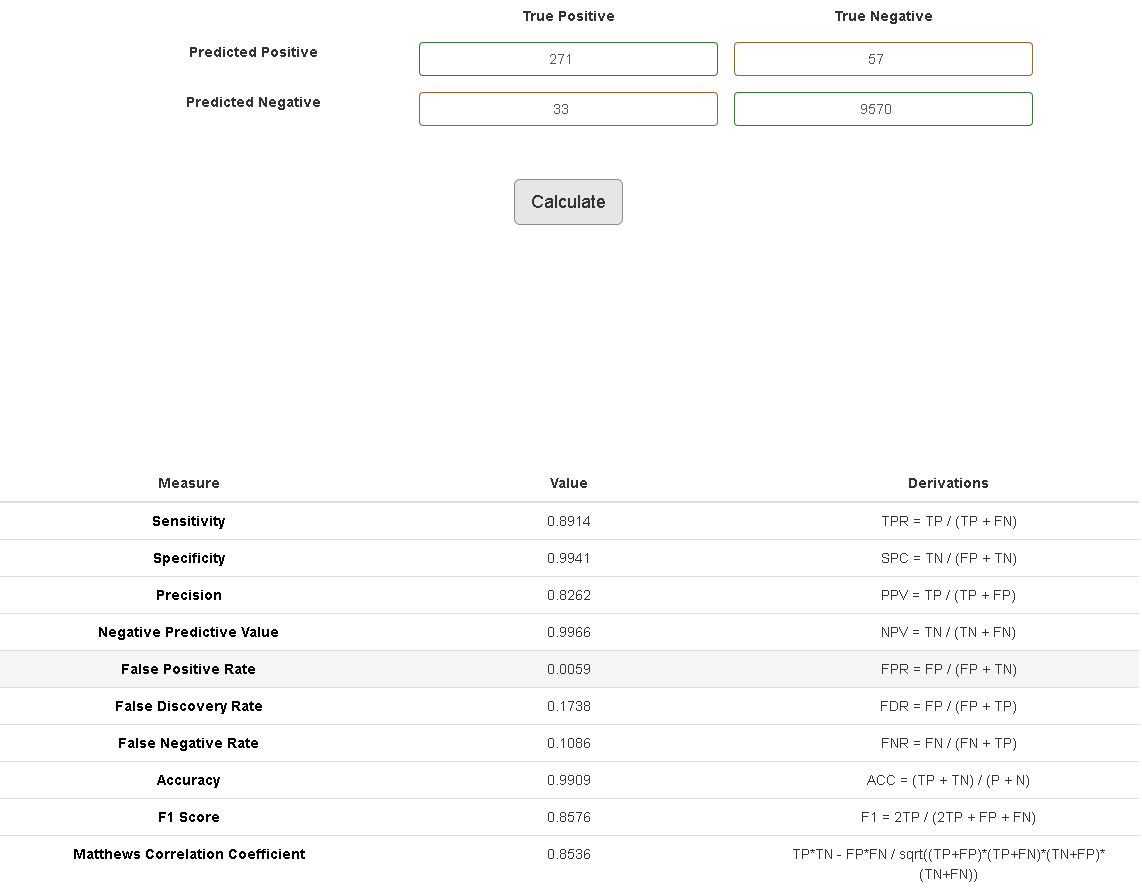

In [143]:
from IPython.display import Image
Image('testes.png')